# PLSCI7201 Lecture 2

# A Motivating Example: Using Aerial Images for Plant Science

***

### What is a phenotype?
* The set of observable characteristics of an individual resulting from the interaction of its genotype with the environment.
* Anything that can be measured on an individual, except the genomic sequence itself.
* For example: plant height, grain yield, **image features**, gene expression, metabolite concentrations, chlorophyll content, leaf angle, root length, etc.

***

### Question 1
* Can a phenotype be independent of the environment?
* Can a phenotype be independent of genetics?

***

### Advantages of using images to collect phenotypic measurements:
* Repeatable
* Interrogable
* Precise
* Cost-effective
* Rapid
* Sharable and can aggregate

### Aerial images allow plant scientists to study:
* Plant development over time (e.g. growth curve)
* Disease detection
* Predictions for end-of-season traits (e.g. predicting yield)
* Spatial heterogeneity 
* Genotypic plasticity
* Many other topics!

***

### Question 2
* How could images help in your research?

***

## Reflectance of Light on Plants

![title](presentation_images/reflectance_spectra.png)

![title](presentation_images/leaf_reflectance.jpg)

***

## Camera Types

***

### MicaSense Multi-spectral Camera:
![title](presentation_images/micasense_camera.png)

![title](presentation_images/micasense_spectra.png)

***

### Color Cameras:
![title](presentation_images/color_camera.jpg)

***

### Hyper-Spectral Camera:
![title](presentation_images/hyperspectral_camera.png)

***

### Balancing Tradeoffs in Camera Types, in General
* Resolution: Color Cameras > Multi-spectral Cameras > Hyper-spectral Cameras
* Cost: Hyper-spectral Cameras > Multi-spectral Cameras > Color Cameras
* Storage Media Requirements: Hyper-spectral Cameras > Multi-spectral Cameras > Color Cameras
* Weight: Hyper-spectral Cameras > Multi-spectral Cameras > Color Cameras

***

### Question 3
* How do you decide the number of wavelengths to use?
* How do cost, camera size and weight, shutter speed, exposure time, storage media type, and resolution impact taking images in an experiment?

***

### Standardizing Multi-Spectral Images

* Incident light in the field can vary in terms of angle, illumination, reflectivity, etc.
* The MicaSense camera comes with the standardized reflectance panel shown below. The camera also has a solar intensity sensor, on the GPS, that embeds solar intensity into every image capture.

![title](presentation_images/micasense_panel.png)

***

### Question 4
* What steps should be taken to ensure aerial MicaSense images in outdoor settings are standardized?

***

## How to Capture Aerial Images?

***

![title](presentation_images/aerial_drone.png)

![title](presentation_images/aerial_hexacopter_drone.jpg)

***

### Flight Plans

* Software that comes with the drone or software like Litchi can be used to generate flight plans

***

![title](presentation_images/flight_plan.png)

***

### Flight Plan Should:
* Provide greater than 60% overlap in collected images
* Cover entire field, while balancing battery life (e.g. 45 minutes battery time), image resolution, flight altitude and speed

***

### Steps After Images Are Collected
* Transfer images from SD memory card on camera to backup hard drive storage.
* Stitch the collected images into orthophotos of the entire field, using **OpenDroneMap or Pix4d software**.
* Create plot-polygon template for the plots in the image
* Extract phenotypes from the plot-level images

***

### Example Image Capture From MicaSense Camera During Flight

***

**Blue** IMG_0200_1
 
![title](presentation_images/IMG_0200_1.png)

**Green** IMG_0200_2

![title](presentation_images/IMG_0200_2.png)

**Red** IMG_0200_3

![title](presentation_images/IMG_0200_3.png)

**Near Infrared (NIR)** IMG_0200_4

![title](presentation_images/IMG_0200_4.png)

**RedEdge** IMG_0200_5

![title](presentation_images/IMG_0200_5.png)

***

### Example Orthophoto of Maize Field Experiment

* This is the Near Infrared (NIR) Orthophoto, but there are also superimposable blue, green, red, and rededge orthophotos

![title](images/MicaSenseOrthoPhotoImages/nir.JPG)

***

### Question 5

* What are trade offs of using orthophoto images versus the raw imagery?

***

### Or Images Can Be Taken Using Camera Rigs

***

* Such as this RGB color image of Arabidopsis plants

![title](images/ColorImages/Rig1_t1__rgb.JPG)

***

## Working With Python

***

### Loading Python Packages

***

In [1]:
import matplotlib.pyplot as plt # for making plots
import statistics # for taking averages etc
import numpy as np # for doing matrix operations
import csv # for reading and writing csv files
import math
import pandas as pd # for reading and writing dataframes
import cv2 # opencv for image manipulations
import json # for reading JSON
import geopandas # for reading and mapping interactive GeoJSON
import folium # for reading and mapping interactive GeoJSON
import mapclassify # for reading and mapping interactive GeoJSON
from plantcv import plantcv as pcv # for some plant specific image manipulations
import os # for checking filesystem
import random # for random numbers
import copy # for copying variables
import gc # for garbage collection

### Here is an example function

In [2]:
# Defining a function in python that takes in variables a and b
def example_func(a,b):
    return a+b

# Let's use that function:
print(example_func(2,3))

5


***

### Question 6
* Define a function named **example_name** that returns your full name (e.g. First Last) given your first name and last name.
* Define a function named **example_circle_area** that calculates the area of a circle given its diameter.
* Define a function named **random_list** that returns a list of 5 random numbers between (and including) 0 and 10.
* Define a function named **random_dictionary** that returns a list of 5 items (dictionaries) given the following attributes: 'size' and 'distance'. The attributes are randomly assigned between (and including) 0 and 10.

***

In [3]:
# ANSWER Question 6

def example_name(first_name, last_name):
    return first_name+" "+last_name

print(example_name("Nicolas", "Morales"))

def example_circle_area(diameter):
    area = math.pi * (diameter/2)**2
    return area

print(example_circle_area(2))

def random_list():
    randomlist = []
    for i in range(0,5):
        n = random.randint(0,10)
        randomlist.append(n)
    return randomlist

print(random_list())

def random_dictionary(attributes):
    randomlist = []
    for i in range(0,5):
        dictionary = {}
        for j in attributes:
            n = random.randint(0,10)
            dictionary[j] = n
        randomlist.append(dictionary)
    return randomlist

print(random_dictionary(['size','distance']))

Nicolas Morales
3.141592653589793
[8, 6, 10, 6, 1]
[{'size': 4, 'distance': 3}, {'size': 1, 'distance': 8}, {'size': 2, 'distance': 6}, {'size': 7, 'distance': 2}, {'size': 4, 'distance': 8}]


***

## Let's Do Some Image Manipulations

***

### Rotating Image:

***

### Let's Read in Our Color Image

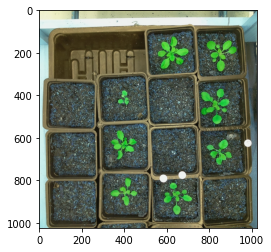

In [4]:
# Read color image into memory
original_color_img = cv2.imread('images/ColorImages/Rig1_t1__rgb.JPG', cv2.IMREAD_UNCHANGED)

# Display the image
plt.imshow(original_color_img)

### Let's Define a Dunction to Rotate an Image

In [5]:
# Define a function to rotate an image by a given angle
def rotate_image(img, angle, correct_bounds):
    
    # Get the dimensions of the image in pixels
    height, width = img.shape[:2]

    # Make an array that has the center position of the image
    image_center = (width/2, height/2)

    # Get the rotation matrix 
    rotation_mat = cv2.getRotationMatrix2D(image_center, angle, 1)

    if correct_bounds == True:
        # Define bounding box to make sure we don't cut off any part of the image after rotating
        abs_cos = abs(rotation_mat[0,0])
        abs_sin = abs(rotation_mat[0,1])

        bound_w = int(height * abs_sin + width * abs_cos)
        bound_h = int(height * abs_cos + width * abs_sin)

        rotation_mat[0, 2] += bound_w/2 - image_center[0]
        rotation_mat[1, 2] += bound_h/2 - image_center[1]

        bounding = (bound_w, bound_h)
    else:
        # Use the dimensions of the non-rotated image
        bounding = (width, height)

    # Rotate image
    img_rotated = cv2.warpAffine(img, rotation_mat, bounding)
    
    return img_rotated

### Rotating Image Example

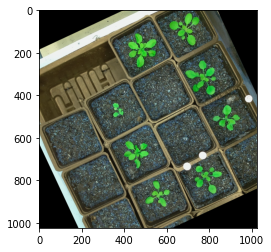

In [6]:
# Define the angle we want to rotate. Positive is counter-clockwise and negative is clockwise
angle = 25

# Use function to rotate image, Try changing correct_bounds from False to True
correct_bounds = False
rotated_img = rotate_image(original_color_img, angle, correct_bounds)

# Display the image
plt.imshow(rotated_img)

***

### Question 7
* Modify the Rotating Image Example code above to rotate the image 300 degrees and to not cut off any part of the image after rotation.

***

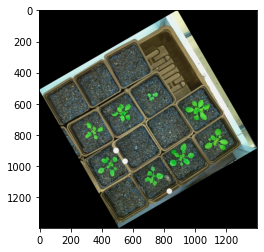

In [7]:
# ANSWER Question 7

# Rotate the image by 300 and set correct_bounds to True
rotated_img = rotate_image(original_color_img, 300, True)

# Display the image
plt.imshow(rotated_img)

### Let's Save the Rotated Color Image

In [8]:
# Save the rotated image
cv2.imwrite('images/ColorImages/Processed/Rig1_t1_rotated__rgb.png', rotated_img)

True

***

## (1) Let's Process the Color Image Into Plot-Level Images

***

### Let's Apply a Rotation to Straighten the Color Image

True

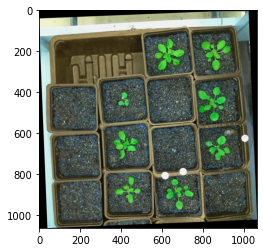

In [9]:
# Use function to rotate image by 2.33 degrees
rotated_img = rotate_image(original_color_img, 2.33, True)

# Show the image
plt.imshow(rotated_img)

# Save rotated image
cv2.imwrite('images/ColorImages/Processed/Rig1_t1_rotated__rgb.png', rotated_img)

***

### Making Vegetation Indices From Color RGB Images

* Vegetation Indices aim to quantify vegetation quantity and quality, either targeting photosynthetic productivity through chlorophyll or thresholding colors or targetting stress related processes.

***

### Let's Make the Triangular Greenness Index (TGI) https://doi.org/10.2134/agronj2010.0395

True

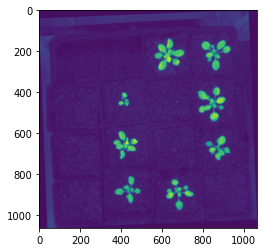

In [10]:
# Split image into
b,g,r = cv2.split(rotated_img)

# Triangular Greenness Index (TGI)
tgi = g - 0.39*r - 0.61*b

# Show the image
plt.imshow(tgi)

# Save TGI image
cv2.imwrite('images/ColorImages/Processed/TGI.png', tgi)

### Let's Make the Visible Atmospherically Resistant Index (VARI) https://doi.org/10.1016/j.jag.2012.07.020

/tmp/ipykernel_134318/473918905.py:4: RuntimeWarning: divide by zero encountered in true_divide
/tmp/ipykernel_134318/473918905.py:4: RuntimeWarning: invalid value encountered in true_divide


True

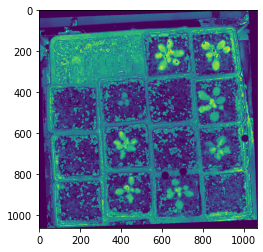

In [11]:
# Visible Atmospherically Resistant Index (VARI)
vari_numerator = g - r
vari_denominator = g + r - b
vari = np.divide(vari_numerator, vari_denominator)
vari[np.isnan(vari)] = 0

# Make VARI a valid image between 0 and 255, instead of between 0 and 1 (because of the division)
vari_img = vari*255
vari_img = vari_img.astype(np.uint8)

# Show the image
plt.imshow(vari_img)

# Save the VARI image
cv2.imwrite('images/ColorImages/Processed/VARI.png', vari_img)

***

### Question 8
* How many vegetation indices could be measured from a color image?
* What are some potential pros and cons to using vegetation indices?
* Can you think of other better ways to quantify vegetation quantity and quality from images?

***

### Load in Plot Polygon JSON For Color Images

* Plot Polygons are the bounding boxes of the plots, or plants in this case, in the image. There are 16 plots in this color image, for the 16 plant pots.

In [12]:
# Read the JSON plot-polygon template into memory. This was created using ImageBreed (imagebreed.org)
color_plot_polygon_json = open('images/ColorImages/ColorImages.geojson')

# Use JSON package to load JSON
color_plot_polygon_dictionary = json.load(color_plot_polygon_json)

# View the JSON object
print(color_plot_polygon_dictionary['features'])

[{'properties': {'ID': '7'}, 'geometry': {'coordinates': [[[300, 331], [531, 331], [531, 561], [300, 561], [300, 331]]], 'type': 'Polygon'}, 'type': 'Feature', 'field_trial_name': 'field_trial2'}, {'type': 'Feature', 'field_trial_name': 'field_trial2', 'properties': {'ID': '10'}, 'geometry': {'coordinates': [[[298, 561], [529, 561], [529, 791], [298, 791], [298, 561]]], 'type': 'Polygon'}}, {'properties': {'ID': '13'}, 'geometry': {'coordinates': [[[759, 798], [990, 798], [990, 1028], [759, 1028], [759, 798]]], 'type': 'Polygon'}, 'type': 'Feature', 'field_trial_name': 'field_trial2'}, {'field_trial_name': 'field_trial2', 'type': 'Feature', 'geometry': {'coordinates': [[[296, 791], [527, 791], [527, 1021], [296, 1021], [296, 791]]], 'type': 'Polygon'}, 'properties': {'ID': '15'}}, {'properties': {'ID': '14'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[527, 794], [759, 794], [759, 1024], [527, 1024], [527, 794]]]}, 'type': 'Feature', 'field_trial_name': 'field_trial2'}, {'geometr

***

### Let's Draw the Plot Polygons Onto The Color Image to See

***

In [13]:
# Define a Function to Draw Plot Polygons Onto An Image

def draw_plot_polygons(img, number_of_plots, plot_polygon_dictionary, output_image_location, show_image):
    # Make a deep copy of the rotated image, so that they can be separate
    img_copy = copy.deepcopy(img)

    # Let's Save the Plot IDs For Later
    plot_identifiers = []

    # Loop over the plots
    for plot_number in range(0, number_of_plots-1):

        # Extract the Plot ID From the JSON
        plot_id = plot_polygon_dictionary['features'][plot_number]['properties']['ID']

        # Save the Plot IDs For Later
        plot_identifiers.append(plot_id)

        # Extract the Plot Polygon Coordinates From the JSON
        plot_polygon_coordinates = plot_polygon_dictionary['features'][plot_number]['geometry']['coordinates'][0]
        #print(plot_polygon_coordinates)

        # Get the Top Left and Bottom Right Coordinates For the Plot
        top_left_corner_x = int(plot_polygon_coordinates[0][0])
        top_left_corner_y = int(plot_polygon_coordinates[0][1])
        bottom_right_corner_x = int(plot_polygon_coordinates[2][0])
        bottom_right_corner_y = int(plot_polygon_coordinates[2][1])

        # Draw the Rectangle onto the image using OpenCV
        red_color = (0, 0, 255)
        thickness = 3
        cv2.rectangle(img_copy, (top_left_corner_x, top_left_corner_y), (bottom_right_corner_x, bottom_right_corner_y), red_color, thickness)

    if show_image == True:
        # Show the image
        plt.imshow(img_copy)

    # Save rotated image with plot polygons for visualization
    cv2.imwrite(output_image_location, img_copy)
    
    return plot_identifiers

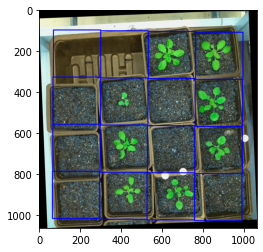

In [14]:
number_plots_color_image = 16
color_plot_identifiers = draw_plot_polygons(rotated_img, number_plots_color_image, color_plot_polygon_dictionary,
                                            'images/ColorImages/Processed/Rig1_t1_rotated_wPlotPolygon__rgb.png', True)

### Extracting Plot Phenotypes From Color Images

In [15]:
# Initialize where we will store the TGI and VARI plot phenotypes
color_plot_polygon_tgi = []
color_plot_polygon_vari = []
    
for plot_number in range(0, number_plots_color_image-1):
    
    # Extract the Plot ID From the JSON
    plot_id = color_plot_polygon_dictionary['features'][plot_number]['properties']['ID']
    
    # Extract the Plot Polygon Coordinates From the JSON
    plot_polygon_coordinates = color_plot_polygon_dictionary['features'][plot_number]['geometry']['coordinates'][0]
    
    # Get the 4 Corners Coordinates of the Plot Polygon
    top_left_corner_x = plot_polygon_coordinates[0][0]
    top_left_corner_y = plot_polygon_coordinates[0][1]
    top_right_corner_x = plot_polygon_coordinates[1][0]
    top_right_corner_y = plot_polygon_coordinates[1][1]
    bottom_right_corner_x = plot_polygon_coordinates[2][0]
    bottom_right_corner_y = plot_polygon_coordinates[2][1]
    bottom_left_corner_x = plot_polygon_coordinates[3][0]
    bottom_left_corner_y = plot_polygon_coordinates[3][1]
    
    # Slice Out the Pixels For The Plot From the Rotated RGB Image
    plot_image = rotated_img[top_left_corner_y:bottom_left_corner_y, top_left_corner_x:top_right_corner_x]
    
    # Save the Plot RGB Image
    cv2.imwrite('images/ColorImages/Processed/plot'+str(plot_id)+'__rgb.png', plot_image)
    
    # Slice Out the Pixels For The Plot From the TGI Image
    plot_tgi_image = tgi[top_left_corner_y:bottom_left_corner_y, top_left_corner_x:top_right_corner_x]
 
    # Save the Plot TGI Image
    cv2.imwrite('images/ColorImages/Processed/plot'+str(plot_id)+'__tgi.png', plot_tgi_image)
    
    # Slice Out the Pixels For The Plot From the VARI Image
    plot_vari_image = vari_img[top_left_corner_y:bottom_left_corner_y, top_left_corner_x:top_right_corner_x]
    
    # Save the Plot VARI Image
    cv2.imwrite('images/ColorImages/Processed/plot'+str(plot_id)+'__vari.png', plot_vari_image)
    
    # Get the Dimensions of the Plot Image in Pixels
    height, width = plot_image.shape[:2]
    
    # Loop Over the Pixels in the Plot TGI and VARI Images and Put Pixel Values Into A List
    tgi_pixel_array = []
    vari_pixel_array = []
    for i in range(0, height):
        for j in range(0, width):
            tgi_pixel_array.append(plot_tgi_image[i,j]/255)
            vari_pixel_array.append(plot_vari_image[i,j]/255)

    # Get the Mean Of the TGI and VARI Pixel Values For the Plot
    mean_tgi = statistics.mean(tgi_pixel_array)
    mean_vari = statistics.mean(vari_pixel_array)
   
    # Save the Plot Mean TGI and VARI
    color_plot_polygon_tgi.append(mean_tgi)
    color_plot_polygon_vari.append(mean_vari)

# Print the TGI and VARI phenotypes to View
print(color_plot_polygon_tgi)
print(color_plot_polygon_vari)
print("DONE")

[0.049502289980550854, 0.09135469418333869, 0.03224724408867632, 0.06973420503906437, 0.08362690052032808, 0.023663220595584563, 0.12845788908448755, 0.027984727804165145, 0.02890962677561143, 0.022313785276956634, 0.10858451449090835, 0.033898273195971405, 0.11709449555843418, 0.07917407399241556, 0.028942894729106036]
[0.2539231555599842, 0.32476921203263914, 0.28850389167524715, 0.32633680613220256, 0.29556221889055473, 0.533492003998001, 0.3918467096983721, 0.256815801419382, 0.262729154903068, 0.5445188457464673, 0.39253174787701645, 0.21089986455715357, 0.3483704417208254, 0.3203608489872711, 0.27522091895228856]
DONE


### Viewing Plot Phenotypes From Color Images

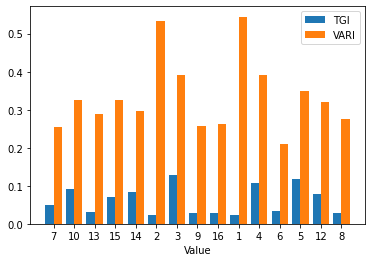

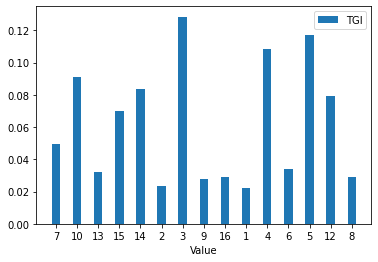

In [16]:
# Make the x-axis From Plot IDs For Drawing Barcharts
x_axis = np.arange(len(color_plot_identifiers))

# Make multiple barchart, with plot numbers on x-axis and phenotype values as bars
plt.bar(x_axis -0.2, color_plot_polygon_tgi, width=0.4, label = 'TGI')
plt.bar(x_axis +0.2, color_plot_polygon_vari, width=0.4, label = 'VARI')
plt.xticks(x_axis, color_plot_identifiers)
plt.legend()
plt.xlabel("Plot Numbers")
plt.xlabel("Value")
plt.show()

# Make TGI barchart, with plot numbers on x-axis and phenotype values as bars
plt.bar(x_axis, color_plot_polygon_tgi, width=0.4, label = 'TGI')
plt.xticks(x_axis, color_plot_identifiers)
plt.legend()
plt.xlabel("Plot Numbers")
plt.xlabel("Value")
plt.show()

***

### Question 9
* How many plants are there actually? Write a function to calculate the number of plants by using a threshold on TGI. **Hint**: Remember the TGI values are in a list called color_plot_polygon_tgi. **Hint**: Look at the TGI barplot to find a threshold to classify if a plant is there or not.

***

In [17]:
# ANSWER Question 9

# Threshold from barplot above
tgi_plant_threshold = 0.04

# Initialize plant count at 0
color_image_plant_count = 0

# Loop over TGI values
for i in color_plot_polygon_tgi :
    
    # If the TGI value is greater than the threshold, then increase the plant count by 1
    if i > tgi_plant_threshold :
        color_image_plant_count = color_image_plant_count + 1

# Print the result
print("Number of Plants:" + str(color_image_plant_count))

Number of Plants:8


***

### Let's Use PlantCV to Analyze The Plants in These Color Images

***

### Here is An Example for Plot (Plant) Number 3

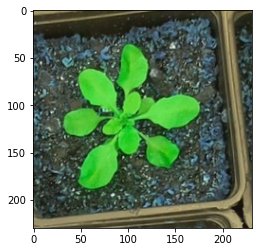

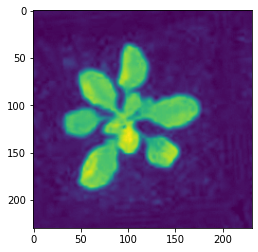

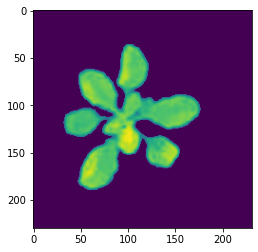

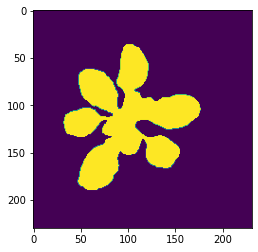

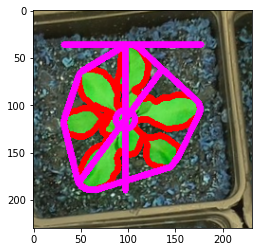

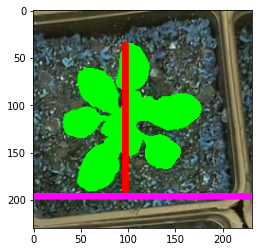

In [18]:
# Read in the RGB and TGI images for Plot 3
pcv_plot3_rgb_img = cv2.imread('images/ColorImages/Processed/plot3__rgb.png', cv2.IMREAD_UNCHANGED)
pcv_plot3_tgi_img = cv2.imread('images/ColorImages/Processed/plot3__tgi.png', cv2.IMREAD_GRAYSCALE)

# Show the RGB image
plt.imshow(pcv_plot3_rgb_img)
plt.show()

# Show the TGI image
plt.imshow(pcv_plot3_tgi_img)
plt.show()

# Make a binary mask threshold of the plant using the TGI
mask_plot3_th, mask_plot3 = cv2.threshold(pcv_plot3_tgi_img, 60, 255, cv2.THRESH_TOZERO)

# Show the Binary TGI Mask
plt.imshow(mask_plot3)
plt.show()

# Follow the PlantCV tutorial https://plantcv.readthedocs.io/en/latest/tutorials/vis_tutorial/

# Find the Objects in the RGB image, using the TGI Mask
id_objects, obj_hierarchy = pcv.find_objects(img=pcv_plot3_rgb_img, mask=mask_plot3)

# Make a Region of Interest (ROI) of the Whole Image
roi1, roi_hierarchy= pcv.roi.rectangle(img=pcv_plot3_rgb_img, x=0, y=0, h=pcv_plot3_rgb_img.shape[0], w=pcv_plot3_rgb_img.shape[1])

# Find the Objects in the ROI
roi_objects, hierarchy3, kept_mask, obj_area = pcv.roi_objects(img=pcv_plot3_rgb_img, roi_contour=roi1, roi_hierarchy=roi_hierarchy, 
                                                               object_contour=id_objects, obj_hierarchy=obj_hierarchy, roi_type='partial')

# Make PlantCV Object Mask
obj, mask = pcv.object_composition(img=pcv_plot3_rgb_img, contours=roi_objects, hierarchy=hierarchy3)

# Show the PlantCV Mask
plt.imshow(mask)
plt.show()

# Run the PlantCV Analysis
analysis_image = pcv.analyze_object(img=pcv_plot3_rgb_img, obj=obj, mask=mask, label="default")

# Show Analysis Image
plt.imshow(analysis_image)
plt.show()

# Run the PlantCV Boundary Analysis
boundary_image = pcv.analyze_bound_horizontal(img=pcv_plot3_rgb_img, obj=obj, mask=mask, line_position=200, label="default")

# Show the PlantCV Boundary Analysis
plt.imshow(boundary_image)
plt.show()

# Save the PlantCV Results for the Analysis and Boundary Analysis We Ran
pcv.outputs.save_results(filename='images/ColorImages/Processed/plot7__pcv.txt')

### Let's Use the PlantCV Results to Compare These Plants

***

### First Define a Function To Run PlantCV

In [19]:
# Define a function to use PlantCV to Analyze Images
def perform_plantcv_analysis(plot_id):
    
    # Read in the RGB and TGI images for the Plot
    img = cv2.imread('images/ColorImages/Processed/plot'+str(plot_id)+'__rgb.png', cv2.IMREAD_UNCHANGED)
    tgi_img = cv2.imread('images/ColorImages/Processed/plot'+str(plot_id)+'__tgi.png', cv2.IMREAD_GRAYSCALE)
    
    # Make a binary mask threshold of the plant using the TGI
    mask_tgi_th, mask_tgi = cv2.threshold(tgi_img, 60, 255, cv2.THRESH_TOZERO)
       
    # Follow the PlantCV tutorial https://plantcv.readthedocs.io/en/latest/tutorials/vis_tutorial/

    # Find the Objects in the RGB image, using the TGI Mask
    id_objects, obj_hierarchy = pcv.find_objects(img=img, mask=mask_tgi)

    # Make a Region of Interest (ROI) of the Whole Image
    roi1, roi_hierarchy= pcv.roi.rectangle(img=img, x=0, y=0, h=img.shape[0], w=img.shape[1])

    # Find the Objects in the ROI
    roi_objects, hierarchy3, kept_mask, obj_area = pcv.roi_objects(img=pcv_plot3_rgb_img, roi_contour=roi1, roi_hierarchy=roi_hierarchy, 
                                                                   object_contour=id_objects, obj_hierarchy=obj_hierarchy, roi_type='partial')
    
    # If More Than 1 Object was Found, To Prevent The Empty Images From Crashing This
    if len(roi_objects) > 0:
        
        # Make PlantCV Object Mask
        obj, mask = pcv.object_composition(img=img, contours=roi_objects, hierarchy=hierarchy3)

        # Run the PlantCV Analysis
        analysis_image = pcv.analyze_object(img=img, obj=obj, mask=mask, label="default")
        
        # Show Analysis Image
        print("PLOT ID: "+plot_id)
        plt.imshow(analysis_image)
        plt.show()

        # Run the PlantCV Boundary Analysis
        boundary_image = pcv.analyze_bound_horizontal(img=img, obj=obj, mask=mask, line_position=200, label="default")
        
        # Save the PlantCV Results for the Analysis and Boundary Analysis We Ran
        pcv.outputs.save_results(filename='images/ColorImages/Processed/plot'+str(plot_id)+'__pcv.txt')


### Then Apply the PlantCV Function To All Plots

PLOT ID: 7


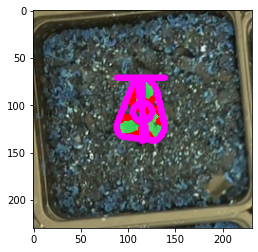

PLOT ID: 10


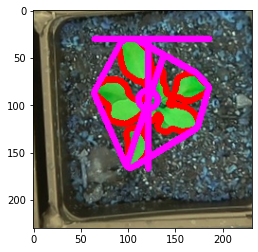

PLOT ID: 15


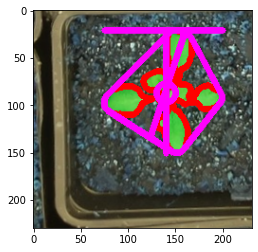

PLOT ID: 14


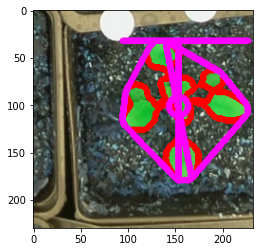

PLOT ID: 3


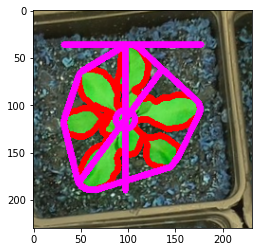

PLOT ID: 4


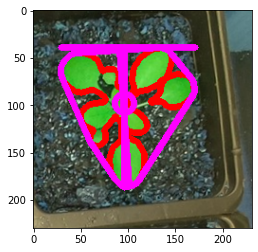

PLOT ID: 5


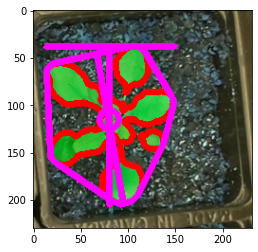

PLOT ID: 12


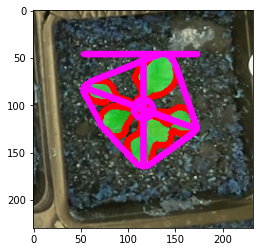

In [20]:
# Apply the PlantCV functions to all of the color plant images

for plot_id in color_plot_identifiers:
    perform_plantcv_analysis(plot_id)

### Save the PlantCV Phenotypes Into A File

In [21]:
# Save the PlantCV phenotypes to a file

plantcv_phenotypes = [['id','area','convex_hull_area','perimeter','width','height','longest_path','solidity']]

for plot_id in color_plot_identifiers:
    
    pcv_results_file = 'images/ColorImages/Processed/plot'+str(plot_id)+'__pcv.txt'
    
    if os.path.isfile(pcv_results_file):
        pcv_results_json = open(pcv_results_file)

        pcv_results_dictionary = json.load(pcv_results_json)

        area = pcv_results_dictionary['observations']['default']['area']['value']
        convex_hull_area = pcv_results_dictionary['observations']['default']['convex_hull_area']['value']
        perimeter = pcv_results_dictionary['observations']['default']['perimeter']['value']
        width = pcv_results_dictionary['observations']['default']['width']['value']
        height = pcv_results_dictionary['observations']['default']['height']['value']
        longest_path = pcv_results_dictionary['observations']['default']['longest_path']['value']
        solidity = pcv_results_dictionary['observations']['default']['solidity']['value'] # area / convex hull area

        plantcv_phenotypes.append([plot_id, area, convex_hull_area, perimeter, width, height, longest_path, solidity])
    else:
        plantcv_phenotypes.append([plot_id, None, None, None, None, None, None])

with open('images/ColorImages/Processed/pcv_phenotypes.csv', 'w') as writeFile:
    writer = csv.writer(writeFile)
    writer.writerows(plantcv_phenotypes)
writeFile.close()

### View How Correlated the PlantCV Phenotypes and Vegetation Indices Are to Eachother

In [22]:
# Load the PlantCV Phenotypes We Just Saved
plantcv_phenotypes_dataframe = pd.read_csv('images/ColorImages/Processed/pcv_phenotypes.csv', sep = ",")

# Exclude the "id" column For Making Correlation
plantcv_phenotypes_values_dataframe = plantcv_phenotypes_dataframe.loc[:, plantcv_phenotypes_dataframe.columns != 'id']

# Add on TGI and VARI as Phenotypes
plantcv_phenotypes_values_dataframe['tgi'] = color_plot_polygon_tgi
plantcv_phenotypes_values_dataframe['vari'] = color_plot_polygon_vari

# Create a Correlation Heatmap of the Phenotypes
pear_corr = plantcv_phenotypes_values_dataframe.corr(method = 'pearson')

# Plot the Correlation
pear_corr.style.background_gradient(cmap = 'Greens')

,area,convex_hull_area,perimeter,width,height,longest_path,solidity,tgi,vari
area,1.000000,0.963171,0.805186,0.877018,0.911520,0.932098,-0.269294,0.989324,0.893373
convex_hull_area,0.963171,1.000000,0.930529,0.905374,0.976298,0.977894,-0.500997,0.930784,0.799526
perimeter,0.805186,0.930529,1.000000,0.818046,0.942131,0.921362,-0.724161,0.749790,0.552902
width,0.877018,0.905374,0.818046,1.000000,0.946287,0.958413,-0.579337,0.800989,0.815189
height,0.911520,0.976298,0.942131,0.946287,1.000000,0.983975,-0.627118,0.854413,0.746832
longest_path,0.932098,0.977894,0.921362,0.958413,0.983975,1.000000,-0.570266,0.876794,0.768851
solidity,-0.269294,-0.500997,-0.724161,-0.579337,-0.627118,-0.570266,1.000000,-0.155214,-0.103839
tgi,0.989324,0.930784,0.749790,0.800989,0.854413,0.876794,-0.155214,1.000000,0.053578
vari,0.893373,0.799526,0.552902,0.815189,0.746832,0.768851,-0.103839,0.053578,1.000000


***

### Question 10
* How is TGI correlated to the PlantCV phenotypes, and why do you think some traits are more highly correlated than others?



***

## (2) Let's Process Multi-Spectral MicaSense Images Into Plot Polygons

***

### First Read the MicaSense Images into Memory

* Do Not Run Yourself, Due to Memory Concerns. Results Are Already Saved In Files.

In [23]:
# Read MicaSense images into memory
# blue_img = cv2.imread('images/MicaSenseOrthoPhotoImages/blue.JPG', cv2.IMREAD_UNCHANGED)
# green_img = cv2.imread('images/MicaSenseOrthoPhotoImages/green.JPG', cv2.IMREAD_UNCHANGED)
# red_img = cv2.imread('images/MicaSenseOrthoPhotoImages/red.JPG', cv2.IMREAD_UNCHANGED)
# nir_img = cv2.imread('images/MicaSenseOrthoPhotoImages/nir.JPG', cv2.IMREAD_UNCHANGED)
# rededge_img = cv2.imread('images/MicaSenseOrthoPhotoImages/rededge.JPG', cv2.IMREAD_UNCHANGED)

### Make a Color Image from Multi-Spectral Images

* Do Not Run Yourself, Due to Memory Concerns. Results Are Already Saved In Files.

In [24]:
# A Color Image is a Stack of Red, Green, and Blue
# mulispec_color_image = cv2.merge((blue_img, green_img, red_img))

# Save the RGB Image
# cv2.imwrite('images/MicaSenseOrthoPhotoImages/Processed/RGB.png', mulispec_color_image)

# MicaSense Images Can Be Very Dark, So We Can Make the RGB Image Brighter
# mulispec_color_image_brighter = cv2.convertScaleAbs(mulispec_color_image, alpha=1.5, beta=40)

# Save the Brightened RGB Image
# cv2.imwrite('images/MicaSenseOrthoPhotoImages/Processed/RGB_brightened.png', mulispec_color_image_brighter)

***

## Let's Make Vegetation Indices From Multi-Spectral MicaSense Images

***

### Make the Normalized Difference Vegetation Index (NDVI) https://doi.org/10.1016/S0034-4257(01)00289-9

* Do Not Run Yourself, Due to Memory Concerns. Results Are Already Saved In Files.

In [25]:
# Normalized Difference Vegetation Index (NDVI)
# ndvi_numerator = nir_img - red_img
# ndvi_denominator = nir_img + red_img
# ndvi = np.divide(ndvi_numerator, ndvi_denominator)
# ndvi[np.isnan(ndvi)] = 0

# Save NDVI image
# ndvi_image = ndvi*255
# ndvi_image = ndvi_image.astype(np.uint8)
# cv2.imwrite('images/MicaSenseOrthoPhotoImages/Processed/NDVI.png', ndvi_image)

### Make the Normalized Difference RedEdge Vegetation Index (NDRE)

* Do Not Run Yourself, Due to Memory Concerns. Results Are Already Saved In Files.

In [26]:
# Normalized Difference RedEdge Vegetation Index (NDRE)
# ndre_numerator = nir_img - rededge_img
# ndre_denominator = nir_img + rededge_img
# ndre = np.divide(ndre_numerator, ndre_denominator)
# ndre[np.isnan(ndre)] = 0

# Save NDRE image
# ndre_image = ndre*255
# ndre_image = ndre_image.astype(np.uint8)
# cv2.imwrite('images/MicaSenseOrthoPhotoImages/Processed/NDRE.png', ndre_image)

### Make the Triangular Greenness Index (TGI) https://doi.org/10.2134/agronj2010.0395 

* Do Not Run Yourself, Due to Memory Concerns. Results Are Already Saved In Files.

In [27]:
# Split the Color Image Into Blue, Green, Red Channels
# b,g,r = cv2.split(mulispec_color_image)

# Triangular Greenness Index (TGI)
# tgi = g - 0.39*r - 0.61*b

# Save TGI image
# cv2.imwrite('images/MicaSenseOrthoPhotoImages/Processed/TGI.png', tgi)

### Make the Visible Atmospherically Resistant Index (VARI) https://doi.org/10.1016/j.jag.2012.07.020

* Do Not Run Yourself, Due to Memory Concerns. Results Are Already Saved In Files.

In [28]:
# Visible Atmospherically Resistant Index (VARI)
# vari_numerator = g - r
# vari_denominator = g + r - b
# vari = np.divide(vari_numerator, vari_denominator)
# vari[np.isnan(vari)] = 0

# Save VARI image
# vari_img = vari*255
# vari_img = vari_img.astype(np.uint8)
# cv2.imwrite('images/MicaSenseOrthoPhotoImages/Processed/VARI.png', vari_img)

### Load in Plot Polygons JSON and Layout For MicaSense Images

In [29]:
# Read in Experiment Layout
layout_multispec_df = pd.read_csv('images/MicaSenseOrthoPhotoImages/ExperimentLayoutMicaSense.csv')
#print(layout_color_df)

# Read the JSON plot-polygon template into memory. This was created using ImageBreed (imagebreed.org)
multispec_plot_polygon_json = open('images/MicaSenseOrthoPhotoImages/MicaSenseOrthoPhotoImages.geojson')

multispec_plot_polygon_dictionary = json.load(multispec_plot_polygon_json)

#print(multispec_plot_polygon_dictionary['features'])

### Draw the Plot Polygons on the MicaSense Orthophoto Image to See

* Do Not Run Yourself, Due to Memory Concerns. Results Are Already Saved In Files.

In [30]:
# number_plots_multispec_image = 800
# multispec_plot_identifiers = draw_plot_polygons(nir_img, number_plots_multispec_image, multispec_plot_polygon_dictionary, 'images/MicaSenseOrthoPhotoImages/Processed/nir_wPlotPolygon.png', False)

### Extracting Plot Phenotypes From MicaSense Images

* Do Not Run Yourself, Due to Memory Concerns. Results Are Already Saved In Files.

In [31]:
# multispec_plot_polygon_ndvi = []
# multispec_plot_polygon_ndre = []
# multispec_plot_polygon_tgi = []
# multispec_plot_polygon_vari = []

# multispec_plot_polygon_ndvi_matrix = np.empty((16,50))
# multispec_plot_polygon_ndre_matrix = np.empty((16,50))
# multispec_plot_polygon_tgi_matrix = np.empty((16,50))
# multispec_plot_polygon_vari_matrix = np.empty((16,50))

# multispec_plot_identifiers = []
    
# for plot_number in range(0, number_plots_multispec_image-1):
    
#     plot_id = multispec_plot_polygon_dictionary['features'][plot_number]['properties']['ID']
#     multispec_plot_identifiers.append(plot_id)
    
#     plot_polygon_coordinates = multispec_plot_polygon_dictionary['features'][plot_number]['geometry']['coordinates'][0]
    
#     top_left_corner_x = int(plot_polygon_coordinates[0][0])
#     top_left_corner_y = int(plot_polygon_coordinates[0][1])
#     top_right_corner_x = int(plot_polygon_coordinates[1][0])
#     top_right_corner_y = int(plot_polygon_coordinates[1][1])
#     bottom_right_corner_x = int(plot_polygon_coordinates[2][0])
#     bottom_right_corner_y = int(plot_polygon_coordinates[2][1])
#     bottom_left_corner_x = int(plot_polygon_coordinates[3][0])
#     bottom_left_corner_y = int(plot_polygon_coordinates[3][1])
    
#     plot_image = mulispec_color_image_brighter[top_left_corner_y:bottom_left_corner_y, top_left_corner_x:top_right_corner_x]
    
#     cv2.imwrite('images/MicaSenseOrthoPhotoImages/Processed/plot'+str(plot_id)+'__rgb.png', plot_image)
    
#     plot_ndvi_image = ndvi_image[top_left_corner_y:bottom_left_corner_y, top_left_corner_x:top_right_corner_x]
    
#     cv2.imwrite('images/MicaSenseOrthoPhotoImages/Processed/plot'+str(plot_id)+'__ndvi.png', plot_ndvi_image)
    
#     plot_ndre_image = ndre_image[top_left_corner_y:bottom_left_corner_y, top_left_corner_x:top_right_corner_x]
    
#     cv2.imwrite('images/MicaSenseOrthoPhotoImages/Processed/plot'+str(plot_id)+'__ndre.png', plot_ndre_image)
    
#     plot_tgi_image = tgi[top_left_corner_y:bottom_left_corner_y, top_left_corner_x:top_right_corner_x]
    
#     cv2.imwrite('images/MicaSenseOrthoPhotoImages/Processed/plot'+str(plot_id)+'__tgi.png', plot_tgi_image)
    
#     plot_vari_image = vari_img[top_left_corner_y:bottom_left_corner_y, top_left_corner_x:top_right_corner_x]
    
#     cv2.imwrite('images/MicaSenseOrthoPhotoImages/Processed/plot'+str(plot_id)+'__vari.png', plot_vari_image)
    
#     height, width = plot_image.shape[:2]
    
#     ndvi_pixel_array = []
#     ndre_pixel_array = []
#     tgi_pixel_array = []
#     vari_pixel_array = []
#     for i in range(0, height):
#         for j in range(0, width):
#             ndvi_pixel_array.append(plot_ndvi_image[i,j]/255)
#             ndre_pixel_array.append(plot_ndre_image[i,j]/255)
#             tgi_pixel_array.append(plot_tgi_image[i,j]/255)
#             vari_pixel_array.append(plot_vari_image[i,j]/255)

#     mean_ndvi = statistics.mean(ndvi_pixel_array)
#     mean_ndre = statistics.mean(ndre_pixel_array)
#     mean_tgi = statistics.mean(tgi_pixel_array)
#     mean_vari = statistics.mean(vari_pixel_array)

#     multispec_plot_polygon_ndvi.append(mean_ndvi)
#     multispec_plot_polygon_ndre.append(mean_ndre)
#     multispec_plot_polygon_tgi.append(mean_tgi)
#     multispec_plot_polygon_vari.append(mean_vari)
    
#     plot_layout_info = layout_multispec_df.loc[layout_multispec_df['plot_number'] == int(plot_id)]
#     plot_row_number = plot_layout_info['row_number']
#     plot_col_number = plot_layout_info['col_number']
    
#     multispec_plot_polygon_ndvi_matrix[plot_col_number-1, plot_row_number-1] = mean_ndvi
#     multispec_plot_polygon_ndre_matrix[plot_col_number-1, plot_row_number-1] = mean_ndre
#     multispec_plot_polygon_tgi_matrix[plot_col_number-1, plot_row_number-1] = mean_tgi
#     multispec_plot_polygon_vari_matrix[plot_col_number-1, plot_row_number-1] = mean_vari

# layout_multispec_phenotypes_df = pd.DataFrame({
#     'plot_number': multispec_plot_identifiers,
#     'NDVI': multispec_plot_polygon_ndvi,
#     'NDRE': multispec_plot_polygon_ndre,
#     'TGI': multispec_plot_polygon_tgi,
#     'VARI': multispec_plot_polygon_vari
# })

# layout_multispec_df['plot_number'] = layout_multispec_df['plot_number'].astype('int')
# layout_multispec_phenotypes_df['plot_number'] = layout_multispec_phenotypes_df['plot_number'].astype('int')
# layout_multispec_wphenos_df = pd.merge(layout_multispec_df, layout_multispec_phenotypes_df, how='inner', on = 'plot_number')

# layout_multispec_wphenos_df.to_csv('images/MicaSenseOrthoPhotoImages/Processed/phenotypes_out.csv')
# layout_multispec_wphenos_df

# with open('images/MicaSenseOrthoPhotoImages/Processed/phenotypes_maxtrix_ndvi.csv', 'w') as writeFile:
#     writer = csv.writer(writeFile)
#     writer.writerows(multispec_plot_polygon_ndvi_matrix)
# writeFile.close()

# with open('images/MicaSenseOrthoPhotoImages/Processed/phenotypes_maxtrix_ndre.csv', 'w') as writeFile:
#     writer = csv.writer(writeFile)
#     writer.writerows(multispec_plot_polygon_ndre_matrix)
# writeFile.close()

# with open('images/MicaSenseOrthoPhotoImages/Processed/phenotypes_maxtrix_tgi.csv', 'w') as writeFile:
#     writer = csv.writer(writeFile)
#     writer.writerows(multispec_plot_polygon_tgi_matrix)
# writeFile.close()

# with open('images/MicaSenseOrthoPhotoImages/Processed/phenotypes_maxtrix_vari.csv', 'w') as writeFile:
#     writer = csv.writer(writeFile)
#     writer.writerows(multispec_plot_polygon_vari_matrix)
# writeFile.close()

# print("Done")

***

### Read in MicaSense Phenotypes We Extracted

***

In [32]:
# Read in Multi-Spec Phenotypes We Just Saved
layout_multispec_wphenos_df = pd.read_csv('images/MicaSenseOrthoPhotoImages/Processed/phenotypes_out.csv')

# View First 10 Rows of Multi-Spec Phenotypes
layout_multispec_wphenos_df.head(10)

,Unnamed: 0,plot_name,accession_name,plot_number,block_number,is_a_control,rep_number,row_number,col_number,NDVI,NDRE,TGI,VARI
0,0,2019_NYH2_plot_1,PHW65_MoG_0041/PHT69,1,1,NaN,1,1,1,0.715192,0.427427,0.022881,0.318084
1,1,2019_NYH2_plot_2,PHW65_MoG_0156/PHT69,2,1,NaN,1,2,1,0.763568,0.468368,0.026721,0.350752
2,2,2019_NYH2_plot_3,PHW65_MoG_0511/PHT69,3,1,NaN,1,3,1,0.723232,0.445205,0.022624,0.342500
3,3,2019_NYH2_plot_4,PHW65_MoG_0133/PHT69,4,1,NaN,1,4,1,0.727994,0.447365,0.023088,0.326343
4,4,2019_NYH2_plot_5,PHW65_MoG_0620/PHT69,5,1,NaN,1,5,1,0.811698,0.495772,0.029838,0.361487
5,5,2019_NYH2_plot_6,PHW65_MoG_0253/PHT69,6,1,NaN,1,6,1,0.768322,0.472392,0.027183,0.343069
6,6,2019_NYH2_plot_7,PHW65_MoG_0040/PHT69,7,1,NaN,1,7,1,0.683872,0.394330,0.025104,0.333430
7,7,2019_NYH2_plot_8,PHW65_MoG_0429/PHT69,8,1,NaN,1,8,1,0.745218,0.450798,0.025012,0.340638
8,8,2019_NYH2_plot_9,PHW65_MoG_0098/PHT69,9,1,NaN,1,9,1,0.728728,0.438771,0.025354,0.339270
9,9,2019_NYH2_plot_10,PHW65_MoG_0296/PHT69,10,1,NaN,1,10,1,0.734902,0.443503,0.025326,0.344125


### Viewing Extracted Phenotypes From Multi-Spectral MicaSense Images

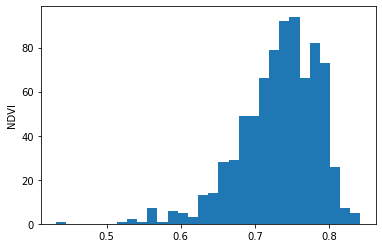

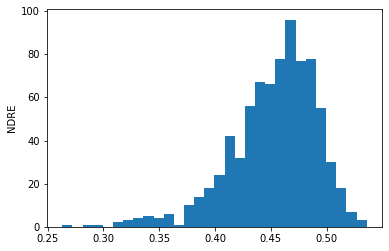

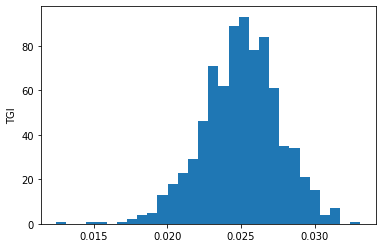

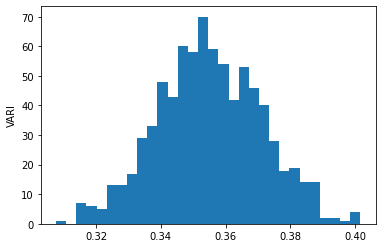

In [33]:
# Make histogram of NDVI, NDRE, TGI, VARI values

plt.hist(layout_multispec_wphenos_df['NDVI'], density=False, bins=30)
plt.ylabel('NDVI')
plt.show()

plt.hist(layout_multispec_wphenos_df['NDRE'], density=False, bins=30)
plt.ylabel('NDRE')
plt.show()

plt.hist(layout_multispec_wphenos_df['TGI'], density=False, bins=30)
plt.ylabel('TGI')
plt.show()

plt.hist(layout_multispec_wphenos_df['VARI'], density=False, bins=30)
plt.ylabel('VARI')
plt.show()

***

### Question 11
* What kind of distribution does this look like?
* What can you say about the range of values for NDVI vs TGI?

***

### Viewing a Heatmap of Extracted Phenotypes

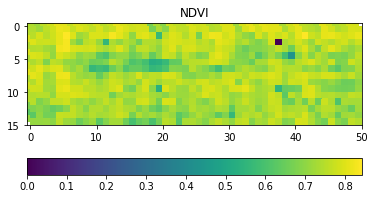

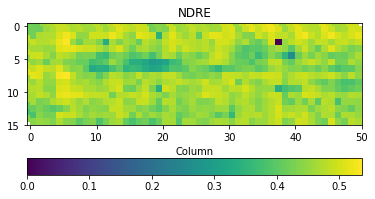

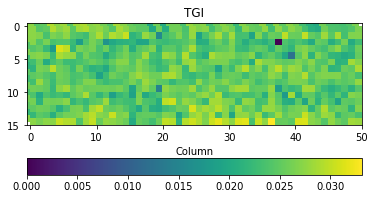

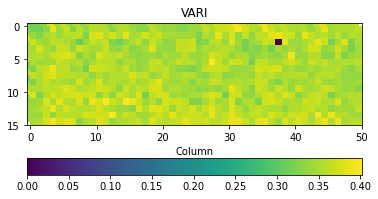

In [34]:
# Read in Multi-Spec Phenotypes We Just Saved
multispec_plot_polygon_ndvi_matrix = pd.read_csv('images/MicaSenseOrthoPhotoImages/Processed/phenotypes_maxtrix_ndvi.csv')
multispec_plot_polygon_ndre_matrix = pd.read_csv('images/MicaSenseOrthoPhotoImages/Processed/phenotypes_maxtrix_ndre.csv')
multispec_plot_polygon_tgi_matrix = pd.read_csv('images/MicaSenseOrthoPhotoImages/Processed/phenotypes_maxtrix_tgi.csv')
multispec_plot_polygon_vari_matrix = pd.read_csv('images/MicaSenseOrthoPhotoImages/Processed/phenotypes_maxtrix_vari.csv')

# Make heatmap of NDVI, NDRE, TGI, VARI values over the Rows and Columns of the Field

fig, axis = plt.subplots()
plt.imshow(multispec_plot_polygon_ndvi_matrix, cmap='viridis')
plt.title("NDVI")
heatmap = axis.pcolor(multispec_plot_polygon_ndvi_matrix, cmap='viridis')
plt.colorbar(heatmap, orientation = "horizontal")
plt.show()

fig, axis = plt.subplots()
plt.imshow(multispec_plot_polygon_ndre_matrix, cmap='viridis')
plt.title("NDRE")
plt.xlabel("Row")
plt.xlabel("Column")
heatmap = axis.pcolor(multispec_plot_polygon_ndre_matrix, cmap='viridis')
plt.colorbar(heatmap, orientation = "horizontal")
plt.show()

fig, axis = plt.subplots()
plt.imshow(multispec_plot_polygon_tgi_matrix, cmap='viridis')
plt.title("TGI")
plt.xlabel("Row")
plt.xlabel("Column")
heatmap = axis.pcolor(multispec_plot_polygon_tgi_matrix, cmap='viridis')
plt.colorbar(heatmap, orientation = "horizontal")
plt.show()

fig, axis = plt.subplots()
plt.imshow(multispec_plot_polygon_vari_matrix, cmap='viridis')
plt.title("VARI")
plt.xlabel("Row")
plt.xlabel("Column")
heatmap = axis.pcolor(multispec_plot_polygon_vari_matrix, cmap='viridis')
plt.colorbar(heatmap, orientation = "horizontal")
plt.show()

***

### Question 12
* What could explain the spatial patterns you see in the heatmaps?
* How would such spatial patterns affect a plant science experiment?

***

### Read in the GPS Coordinates of Plot Polygons to Visualize on a Map

In [35]:
# Read the JSON plot-polygon template into memory. This was created using ImageBreed (imagebreed.org)
multispec_geopandas = geopandas.read_file('images/MicaSenseOrthoPhotoImages/MicaSenseOrthoPhotoImagesGPS.geojson')

# Merge the GPS geopandas dataframe with the phenotypes
multispec_geopandas['ID'] = multispec_geopandas['ID'].astype('int')
layout_multispec_wphenos_df['plot_number'] = layout_multispec_wphenos_df['plot_number'].astype('int')
multispec_geopandas_wphenos = multispec_geopandas.merge(layout_multispec_wphenos_df, how='inner', left_on = 'ID', right_on = 'plot_number')

# View First 10 Rows of GeoPandas Dataframe with Phenotypes
multispec_geopandas_wphenos.head(10)

,ID,geometry,Unnamed: 0,plot_name,accession_name,plot_number,block_number,is_a_control,rep_number,row_number,col_number,NDVI,NDRE,TGI,VARI
0,602,"POLYGON ((-76.65207 42.73245, -76.65205 42.732...",600,2019_NYH2_plot_602,B73/PHM49,602,2,NaN,2,2,13,0.677966,0.428367,0.021229,0.343284
1,757,"POLYGON ((-76.65285 42.73265, -76.65283 42.732...",755,2019_NYH2_plot_757,PHW65_MoG_0192/PHT69,757,2,NaN,2,44,16,0.687812,0.431676,0.026529,0.373349
2,339,"POLYGON ((-76.65275 42.73211, -76.65273 42.732...",337,2019_NYH2_plot_339,PHN11_PHW65_0136/PHT69,339,1,NaN,1,39,7,0.712533,0.429061,0.024950,0.362825
3,118,"POLYGON ((-76.65236 42.73186, -76.65234 42.731...",117,2019_NYH2_plot_118,PHW65_MoG_0306/PHT69,118,1,NaN,1,18,3,0.803896,0.506432,0.027818,0.374654
4,768,"POLYGON ((-76.65264 42.73264, -76.65262 42.732...",766,2019_NYH2_plot_768,PHW65_MoG_0291/PHT69,768,2,NaN,2,33,16,0.767835,0.477211,0.031610,0.368446
5,237,"POLYGON ((-76.65271 42.73199, -76.65269 42.731...",235,2019_NYH2_plot_237,Mo44_PHW65_0220/PHT69,237,1,NaN,1,37,5,0.725364,0.445659,0.021710,0.318753
6,40,"POLYGON ((-76.65277 42.73175, -76.65275 42.731...",39,2019_NYH2_plot_40,PHW65_MoG_0050/PHT69,40,1,NaN,1,40,1,0.700905,0.431038,0.025651,0.371879
7,44,"POLYGON ((-76.65284 42.73176, -76.65282 42.731...",43,2019_NYH2_plot_44,PHW65_MoG_0021/PHT69,44,1,NaN,1,44,1,0.742455,0.456016,0.027498,0.372310
8,497,"POLYGON ((-76.65211 42.73227, -76.65209 42.732...",495,2019_NYH2_plot_497,PHN11_PHW65_0256/PHT69,497,2,NaN,2,4,10,0.727883,0.446880,0.022542,0.350735
9,539,"POLYGON ((-76.65275 42.73235, -76.65273 42.732...",537,2019_NYH2_plot_539,B37/MO17,539,2,NaN,2,39,11,0.642797,0.374751,0.023751,0.354957


### Visualize the GPS Plot Polygons on Map

In [38]:
multispec_geopandas_wphenos.explore(
    column="NDVI", # make choropleth based on "NDVI" column
    tooltip="ID", # show "ID" value in tooltip (on hover)
    popup=True, # show all values in popup (on click)
    tiles="OpenStreetMap", # can be "OpenStreetMap", "CartoDB positron", "CartoDB dark_matter", "Stamen Toner", "Stamen Terrain", "Stamen Water Color" tiles
    cmap="viridis", # use "viridis" matplotlib colormap
    legend=True
)

***

### Question 13
* Use the GeoPandas Map to look at NDVI vs NDRE. Is there a spatial trend?
* What is an advantage of using GeoPandas?

***